# **Neural Network Assignment**

Apply neural networks on Boston housing dataset to predict the median value. Please prepare 3 slides on your approach and findings

In [1]:
! pip install --upgrade xlrd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 96 kB 2.5 MB/s 
  Attempting uninstall: xlrd
    Found existing installation: xlrd 1.1.0
    Uninstalling xlrd-1.1.0:
      Successfully uninstalled xlrd-1.1.0


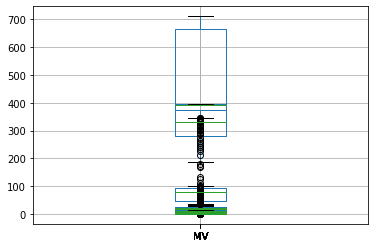

In [74]:
import pandas as pd
import numpy as np
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from keras.utils.vis_utils import plot_model
from sklearn.metrics import accuracy_score
from IPython.display import Image

## Fetching Boston Housing Dataset ##
bos_hous = pd.read_excel('boston housing.xls')
bos_hous.columns


## Plotting Boxplot to identify outliers in each columns ##
def box_plot(bos_hous, feature):
  bos_hous.boxplot(column = feature)
  # plt.grid(False)
  # plt.show()

cols = bos_hous.columns
for col in cols:
  box_plot(bos_hous, col)


## Defining outliers in each columns and removing them to pre-process data ##
def outlier(bos_hous, feature):
  q1 = bos_hous[feature].quantile(0.25)
  q3 = bos_hous[feature].quantile(0.75)
  iqr = q3 - q1
  lb = q1 - 1.5 * iqr
  ub = q3 + 1.5 * iqr
  out_index = bos_hous.index[(bos_hous[feature] < lb) | (bos_hous[feature] > ub)]
  return out_index

out_list = []
for feature in cols:
  out_list.extend(outlier(bos_hous, feature))

def out_exc(bos_hous, out_list):
  outlist = sorted(set(out_list))
  bos_hous = bos_hous.drop(outlist)
  return bos_hous


## Normalizing Dataset ##
bos_hous = out_exc(bos_hous, out_list)
bos_hous_scaled = normalize(bos_hous)
bos_hous_scaled = pd.DataFrame(bos_hous_scaled, columns = bos_hous.columns)
bos_hous_scaled

categ = bos_hous_scaled.drop(['MV'],axis=1)
dep = bos_hous_scaled[['MV']]
X = np.array(categ)
Y = np.array(dep)


## Train Test Split to evaluate neural network model ##
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

In [75]:
## Fitting Neural Network Model with Sigmoid function using Sequential Method and adding hidden layers to network ##
neural_model = Sequential(name = 'BostonHousing')

neural_model.add(Dense(8, input_dim = 13, activation = 'sigmoid', name = 'Hidden-1'))
neural_model.add(Dense(3, activation = 'sigmoid', name = 'Hidden-2'))
neural_model.add(Dense(1, activation = 'sigmoid', name = 'Output'))
neural_model.compile(optimizer = 'sgd', loss = 'mse', metrics = ['mse', 'mae'])
hist = neural_model.fit(X_train, Y_train, batch_size = 12, epochs = 100, validation_data=(X_test,Y_test))


## Printing Summary of the model ##
print(neural_model.summary(),"\n")

Epoch 1/100
18/18 [==============================] - 1s 36ms/step - loss: 0.2175 - mse: 0.2175 - mae: 0.4661 - val_loss: 0.2106 - val_mse: 0.2106 - val_mae: 0.4588
Epoch 2/100
18/18 [==============================] - 0s 5ms/step - loss: 0.2033 - mse: 0.2033 - mae: 0.4507 - val_loss: 0.1970 - val_mse: 0.1970 - val_mae: 0.4437
Epoch 3/100
18/18 [==============================] - 0s 4ms/step - loss: 0.1902 - mse: 0.1902 - mae: 0.4359 - val_loss: 0.1843 - val_mse: 0.1843 - val_mae: 0.4292
Epoch 4/100
18/18 [==============================] - 0s 3ms/step - loss: 0.1779 - mse: 0.1779 - mae: 0.4216 - val_loss: 0.1725 - val_mse: 0.1725 - val_mae: 0.4152
Epoch 5/100
18/18 [==============================] - 0s 6ms/step - loss: 0.1665 - mse: 0.1665 - mae: 0.4079 - val_loss: 0.1615 - val_mse: 0.1615 - val_mae: 0.4017
Epoch 6/100
18/18 [==============================] - 0s 4ms/step - loss: 0.1559 - mse: 0.1559 - mae: 0.3947 - val_loss: 0.1513 - val_mse: 0.1513 - val_mae: 0.3889
Epoch 7/100
18/18 [==

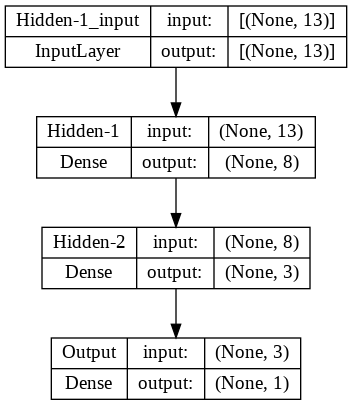

In [76]:
## Plotting neural network model using sigmoid function with Input, Hidden & Output layers ##
plot_model(neural_model, to_file='sigmoid_model.png', show_shapes=True, show_layer_names=True)
Image('sigmoid_model.png')

In [77]:
## Train & Test Evaluation of the model to calculate the accuracy ##
train_eval = neural_model.evaluate(X_train, Y_train)
test_eval = neural_model.evaluate(X_test, Y_test)

print("\n")
for i in range(len(test_eval)):
    print(f'{neural_model.metrics_names[i]} — -> {test_eval[i]}')


## Calculating accuracy using Root Mean Square Error & Root Mean Average Error of the model ##
print('\nTesting Accuracy Score wrt MSE:', (100 - (np.sqrt(np.mean(hist.history['mse'])))))
print('\nTesting Accuracy Score wrt MAE:', (100 - (np.sqrt(np.mean(hist.history['mae'])))))

2/2 [==============================] - 0s 7ms/step - loss: 0.0078 - mse: 0.0078 - mae: 0.0879


loss — -> 0.007819741033017635
mse — -> 0.007819741033017635
mae — -> 0.08789669722318649

Testing Accuracy Score wrt MSE: 99.79161248509439

Testing Accuracy Score wrt MAE: 99.57092823119844


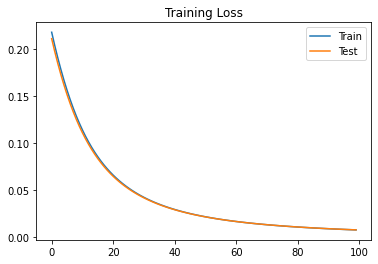

In [78]:
# Plot loss during the model fitting of train & test split ##
pyplot.title('Training Loss')
pyplot.plot(hist.history['loss'], label = 'Train')
pyplot.plot(hist.history['val_loss'], label = 'Test')
pyplot.legend()